### Plot the figures in the main page

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../data/" directory

import os
import os.path as osp
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import json
#script_dir = osp.realpath(__file__)
js_f = osp.normpath(osp.join("../aly","feat_dict.json"))
with open(js_f, 'r') as infile:
    feat_dict = json.load(infile)
feat_col = feat_dict['norm_onehot_feats'][0:8]
feat_col.append('ltt_shape_cat')
feat_col.append('gamma_cat')

In [3]:
feat_col1 = []
for item in feat_col:
    if 'norm' in item:
        temp = item[0:-5]
        if 'R0' in temp:
            feat_col1.append('R0')
        else:
            feat_col1.append(temp)
    else:
        feat_col1.append(item)

## Model limitation analysis

In [4]:
cor_org_df = pd.read_csv(f'/mnt/data2/chaoyue/result/ddt/test/mis_aly/cor_org.csv')
cor_org_df = cor_org_df[cor_org_df['label'] != 3]
cor_org_df

,sim,state_id,v_sampling_fraction,v_cluster_size,v_timespan,oster,PD,abs_growth_rate,fraction_time_growth,r_max,cherries,BLD,new_R0,label,pred_label,pred_score_0,pred_score_1,pred_score_2
0,1004.0,6.0,0.539304,85.0,39.0,39.011500,676.0,7.363082,0.263158,116.226320,0.326087,2.5,2.357553,1,1,1.631032,3.290745,-0.782866
1,1004.0,6.0,0.539304,85.0,39.0,39.011500,676.0,7.363082,0.263158,116.226320,0.326087,2.5,2.357553,1,1,1.657813,2.456428,-0.195627
2,1004.0,6.0,0.539304,85.0,39.0,39.011500,676.0,7.363082,0.263158,116.226320,0.326087,2.5,2.357553,1,1,1.029596,4.487266,-1.538111
3,1004.0,3.0,0.148522,987.0,22.0,22.012625,390.0,6.669989,0.400000,44.123028,0.264706,-4.0,1.718265,0,0,3.025898,0.287590,0.837771
4,1004.0,5.0,0.476404,286.0,32.0,32.010853,1653.0,31.365913,0.866667,357.395700,0.326531,2.0,1.824276,2,2,2.326966,-3.498617,4.601852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072392,10099.0,3.0,0.378970,97.0,56.0,56.006850,239.0,1.810636,0.111111,38.895527,0.190476,-2.5,1.880629,2,2,0.967754,-3.839185,5.110500
1072393,10099.0,3.0,0.378970,97.0,56.0,56.006850,239.0,1.810636,0.111111,38.895527,0.190476,-2.5,1.880629,2,2,0.875729,-4.158272,5.567754
1072394,10099.0,3.0,0.378970,97.0,56.0,56.006850,239.0,1.810636,0.111111,38.895527,0.190476,-2.5,1.880629,2,2,1.586200,-3.465126,4.681306
1072395,10099.0,3.0,0.378970,97.0,56.0,56.006850,239.0,1.810636,0.111111,38.895527,0.190476,-2.5,1.880629,2,2,1.262101,-3.950647,5.376697


In [5]:
mis_org_df = pd.read_csv(f'/mnt/data2/chaoyue/result/ddt/test/mis_aly/mis_org.csv')
mis_org_df = mis_org_df[mis_org_df['label'] != 3]
mis_org_df = mis_org_df.reset_index(drop=True)
mis_org_df

,sim,state_id,v_sampling_fraction,v_cluster_size,v_timespan,oster,PD,abs_growth_rate,fraction_time_growth,r_max,cherries,BLD,new_R0,label,pred_label,pred_score_0,pred_score_1,pred_score_2
0,1004.0,3.0,0.148522,987.0,22.0,22.012625,390.0,6.669989,0.400000,44.123028,0.264706,-4.0,1.718265,0,1,1.776350,1.948528,-0.014647
1,1004.0,3.0,0.148522,987.0,22.0,22.012625,390.0,6.669989,0.400000,44.123028,0.264706,-4.0,1.718265,0,1,2.236259,2.807514,-0.971230
2,1004.0,3.0,0.148522,987.0,22.0,22.012625,390.0,6.669989,0.400000,44.123028,0.264706,-4.0,1.718265,0,1,1.421822,2.523721,-0.424674
3,1004.0,5.0,0.476404,286.0,32.0,32.010853,1653.0,31.365913,0.866667,357.395700,0.326531,2.0,1.824276,2,0,2.673434,0.042914,1.193717
4,1004.0,3.0,0.148522,987.0,22.0,22.012625,390.0,6.669989,0.400000,44.123028,0.264706,-4.0,1.718265,0,1,2.132479,2.807929,-0.815997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324760,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,0.189189,0.0,2.527407,0,2,1.840322,0.008168,1.854405
324761,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,0.189189,0.0,2.527407,0,1,1.692484,1.948840,0.080190
324762,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,0.189189,0.0,2.527407,0,1,1.542226,1.623368,0.449515
324763,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,0.189189,0.0,2.527407,0,1,1.646238,1.971350,0.121342


In [6]:
df = pd.concat([cor_org_df,mis_org_df],axis=0,ignore_index=True)
df

,sim,state_id,v_sampling_fraction,v_cluster_size,v_timespan,oster,PD,abs_growth_rate,fraction_time_growth,r_max,cherries,BLD,new_R0,label,pred_label,pred_score_0,pred_score_1,pred_score_2
0,1004.0,6.0,0.539304,85.0,39.0,39.011500,676.0,7.363082,0.263158,116.226320,0.326087,2.5,2.357553,1,1,1.631032,3.290745,-0.782866
1,1004.0,6.0,0.539304,85.0,39.0,39.011500,676.0,7.363082,0.263158,116.226320,0.326087,2.5,2.357553,1,1,1.657813,2.456428,-0.195627
2,1004.0,6.0,0.539304,85.0,39.0,39.011500,676.0,7.363082,0.263158,116.226320,0.326087,2.5,2.357553,1,1,1.029596,4.487266,-1.538111
3,1004.0,3.0,0.148522,987.0,22.0,22.012625,390.0,6.669989,0.400000,44.123028,0.264706,-4.0,1.718265,0,0,3.025898,0.287590,0.837771
4,1004.0,5.0,0.476404,286.0,32.0,32.010853,1653.0,31.365913,0.866667,357.395700,0.326531,2.0,1.824276,2,2,2.326966,-3.498617,4.601852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397157,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,0.189189,0.0,2.527407,0,2,1.840322,0.008168,1.854405
1397158,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,0.189189,0.0,2.527407,0,1,1.692484,1.948840,0.080190
1397159,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,0.189189,0.0,2.527407,0,1,1.542226,1.623368,0.449515
1397160,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,0.189189,0.0,2.527407,0,1,1.646238,1.971350,0.121342


In [7]:
df = df[df['sim']>10000]
df = df.reset_index()
df

,index,sim,state_id,v_sampling_fraction,v_cluster_size,v_timespan,oster,PD,abs_growth_rate,fraction_time_growth,r_max,cherries,BLD,new_R0,label,pred_label,pred_score_0,pred_score_1,pred_score_2
0,949719,11009.0,3.0,0.883899,28.0,107.0,107.003450,1013.0,8.243278,0.849057,359.163640,0.220588,-2.0,0.576829,2,2,1.042125,0.093632,2.177224
1,949720,11009.0,3.0,0.883899,28.0,107.0,107.003450,1013.0,8.243278,0.849057,359.163640,0.220588,-2.0,0.576829,2,2,1.416917,-0.206768,2.330185
2,949721,11009.0,3.0,0.883899,28.0,107.0,107.003450,1013.0,8.243278,0.849057,359.163640,0.220588,-2.0,0.576829,2,2,1.493922,-0.426510,2.388749
3,949722,11009.0,3.0,0.883899,28.0,107.0,107.003450,1013.0,8.243278,0.849057,359.163640,0.220588,-2.0,0.576829,2,2,1.546957,0.398251,1.742340
4,949723,11009.0,3.0,0.883899,28.0,107.0,107.003450,1013.0,8.243278,0.849057,359.163640,0.220588,-2.0,0.576829,2,2,0.841987,-0.524538,2.395427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202772,1397157,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,0.189189,0.0,2.527407,0,2,1.840322,0.008168,1.854405
202773,1397158,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,0.189189,0.0,2.527407,0,1,1.692484,1.948840,0.080190
202774,1397159,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,0.189189,0.0,2.527407,0,1,1.542226,1.623368,0.449515
202775,1397160,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,9.343329,0.189189,0.0,2.527407,0,1,1.646238,1.971350,0.121342


In [8]:
tree_ids = df['sim'].unique()
for feat in ['v_sampling_fraction','v_cluster_size','v_timespan','oster','PD','cherries','BLD','r_max']:
    cats, bins = pd.qcut(df[feat], 8, retbins=True, duplicates='drop',precision=2)
    cat_dict = {cat: i for i, cat in enumerate(cats.unique())}
    df[f"{feat}_bins"] = cats
df

,index,sim,state_id,v_sampling_fraction,v_cluster_size,v_timespan,oster,PD,abs_growth_rate,fraction_time_growth,...,pred_score_1,pred_score_2,v_sampling_fraction_bins,v_cluster_size_bins,v_timespan_bins,oster_bins,PD_bins,cherries_bins,BLD_bins,r_max_bins
0,949719,11009.0,3.0,0.883899,28.0,107.0,107.003450,1013.0,8.243278,0.849057,...,0.093632,2.177224,"(0.85, 0.9]","(19.99, 29.0]","(102.0, 224.0]","(102.01, 224.0]","(906.0, 1446.0]","(0.11, 0.22]","(-3.0, -1.0]","(278.51, 482.46]"
1,949720,11009.0,3.0,0.883899,28.0,107.0,107.003450,1013.0,8.243278,0.849057,...,-0.206768,2.330185,"(0.85, 0.9]","(19.99, 29.0]","(102.0, 224.0]","(102.01, 224.0]","(906.0, 1446.0]","(0.11, 0.22]","(-3.0, -1.0]","(278.51, 482.46]"
2,949721,11009.0,3.0,0.883899,28.0,107.0,107.003450,1013.0,8.243278,0.849057,...,-0.426510,2.388749,"(0.85, 0.9]","(19.99, 29.0]","(102.0, 224.0]","(102.01, 224.0]","(906.0, 1446.0]","(0.11, 0.22]","(-3.0, -1.0]","(278.51, 482.46]"
3,949722,11009.0,3.0,0.883899,28.0,107.0,107.003450,1013.0,8.243278,0.849057,...,0.398251,1.742340,"(0.85, 0.9]","(19.99, 29.0]","(102.0, 224.0]","(102.01, 224.0]","(906.0, 1446.0]","(0.11, 0.22]","(-3.0, -1.0]","(278.51, 482.46]"
4,949723,11009.0,3.0,0.883899,28.0,107.0,107.003450,1013.0,8.243278,0.849057,...,-0.524538,2.395427,"(0.85, 0.9]","(19.99, 29.0]","(102.0, 224.0]","(102.01, 224.0]","(906.0, 1446.0]","(0.11, 0.22]","(-3.0, -1.0]","(278.51, 482.46]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202772,1397157,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,...,0.008168,1.854405,"(0.85, 0.9]","(19.99, 29.0]","(6.99, 35.0]","(7.03, 35.01]","(44.99, 246.0]","(0.11, 0.22]","(-1.0, 0.0]","(-0.67, 32.85]"
202773,1397158,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,...,1.948840,0.080190,"(0.85, 0.9]","(19.99, 29.0]","(6.99, 35.0]","(7.03, 35.01]","(44.99, 246.0]","(0.11, 0.22]","(-1.0, 0.0]","(-0.67, 32.85]"
202774,1397159,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,...,1.623368,0.449515,"(0.85, 0.9]","(19.99, 29.0]","(6.99, 35.0]","(7.03, 35.01]","(44.99, 246.0]","(0.11, 0.22]","(-1.0, 0.0]","(-0.67, 32.85]"
202775,1397160,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,...,1.971350,0.121342,"(0.85, 0.9]","(19.99, 29.0]","(6.99, 35.0]","(7.03, 35.01]","(44.99, 246.0]","(0.11, 0.22]","(-1.0, 0.0]","(-0.67, 32.85]"


In [9]:
group_dict = {}
i = 0
for group in ['A','B','C','D','E','F','G']:
    group_dict[i] = group
    i += 1
group_dict

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G'}

In [10]:
df['state'] = df['state_id'].apply(lambda x: group_dict[x])

In [11]:
df

,index,sim,state_id,v_sampling_fraction,v_cluster_size,v_timespan,oster,PD,abs_growth_rate,fraction_time_growth,...,pred_score_2,v_sampling_fraction_bins,v_cluster_size_bins,v_timespan_bins,oster_bins,PD_bins,cherries_bins,BLD_bins,r_max_bins,state
0,949719,11009.0,3.0,0.883899,28.0,107.0,107.003450,1013.0,8.243278,0.849057,...,2.177224,"(0.85, 0.9]","(19.99, 29.0]","(102.0, 224.0]","(102.01, 224.0]","(906.0, 1446.0]","(0.11, 0.22]","(-3.0, -1.0]","(278.51, 482.46]",D
1,949720,11009.0,3.0,0.883899,28.0,107.0,107.003450,1013.0,8.243278,0.849057,...,2.330185,"(0.85, 0.9]","(19.99, 29.0]","(102.0, 224.0]","(102.01, 224.0]","(906.0, 1446.0]","(0.11, 0.22]","(-3.0, -1.0]","(278.51, 482.46]",D
2,949721,11009.0,3.0,0.883899,28.0,107.0,107.003450,1013.0,8.243278,0.849057,...,2.388749,"(0.85, 0.9]","(19.99, 29.0]","(102.0, 224.0]","(102.01, 224.0]","(906.0, 1446.0]","(0.11, 0.22]","(-3.0, -1.0]","(278.51, 482.46]",D
3,949722,11009.0,3.0,0.883899,28.0,107.0,107.003450,1013.0,8.243278,0.849057,...,1.742340,"(0.85, 0.9]","(19.99, 29.0]","(102.0, 224.0]","(102.01, 224.0]","(906.0, 1446.0]","(0.11, 0.22]","(-3.0, -1.0]","(278.51, 482.46]",D
4,949723,11009.0,3.0,0.883899,28.0,107.0,107.003450,1013.0,8.243278,0.849057,...,2.395427,"(0.85, 0.9]","(19.99, 29.0]","(102.0, 224.0]","(102.01, 224.0]","(906.0, 1446.0]","(0.11, 0.22]","(-3.0, -1.0]","(278.51, 482.46]",D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202772,1397157,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,...,1.854405,"(0.85, 0.9]","(19.99, 29.0]","(6.99, 35.0]","(7.03, 35.01]","(44.99, 246.0]","(0.11, 0.22]","(-1.0, 0.0]","(-0.67, 32.85]",B
202773,1397158,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,...,0.080190,"(0.85, 0.9]","(19.99, 29.0]","(6.99, 35.0]","(7.03, 35.01]","(44.99, 246.0]","(0.11, 0.22]","(-1.0, 0.0]","(-0.67, 32.85]",B
202774,1397159,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,...,0.449515,"(0.85, 0.9]","(19.99, 29.0]","(6.99, 35.0]","(7.03, 35.01]","(44.99, 246.0]","(0.11, 0.22]","(-1.0, 0.0]","(-0.67, 32.85]",B
202775,1397160,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,...,0.121342,"(0.85, 0.9]","(19.99, 29.0]","(6.99, 35.0]","(7.03, 35.01]","(44.99, 246.0]","(0.11, 0.22]","(-1.0, 0.0]","(-0.67, 32.85]",B


In [12]:
# TB: D growth, E decay
PT_dict_resp = {'A': 0.015, 'B': 0.09, 'C': 0.11, 'D': 0.09, 'E': 0.12, 'F': 0.11, 'G': 0.11}
PT_dict_tb = {'A': 0.025, 'B': 0.015, 'D': 0.015, 'E': 0.025}

In [13]:
df.loc[df['sim']<=10000, 'PT'] = df[df['sim']<=10000]['state'].apply(lambda x: PT_dict_resp[x])
df.loc[df['sim']>10000, 'PT'] = df[df['sim']>10000]['state'].apply(lambda x: PT_dict_tb[x])

In [14]:
df['PT'].unique()

array([0.015, 0.025])

In [15]:
R0_dict_resp = {'A':2.2,'B':3.2,'C':3.9,'D':4.9,'E':4.3,'F':0.8,'G':9.8}
R0_dict_tb = {'A':1.5,'B':0.9,'D':0.7,'E':1.5}

In [16]:
df.loc[df['sim']<=10000, 'R0'] = df[df['sim']<=10000]['state'].apply(lambda x: R0_dict_resp[x])
df.loc[df['sim']>10000, 'R0'] = df[df['sim']>10000]['state'].apply(lambda x: R0_dict_tb[x])

In [17]:
df['R0'].unique()

array([0.7, 0.9, 1.5])

In [18]:
Init_Contact_dict_resp = {'A':16,'B':4,'C':4,'D':6,'E':4,'F':4,'G':6}
Init_Contact_dict_tb = {'A':20,'B':20,'D':15,'E':20}

In [19]:
df.loc[df['sim']<=10000, 'Contact'] = df[df['sim']<=10000]['state'].apply(lambda x: Init_Contact_dict_resp[x])
df.loc[df['sim']>10000, 'Contact'] = df[df['sim']>10000]['state'].apply(lambda x: Init_Contact_dict_tb[x])

In [20]:
df['Contact'].unique()

array([15, 20])

In [21]:
label_dict = {0:'Static',1:'Decay',2:'Growth'}
label_dict

{0: 'Static', 1: 'Decay', 2: 'Growth'}

In [22]:
df['labels'] = df['label'].apply(lambda x: label_dict[x])

In [23]:
df

,index,sim,state_id,v_sampling_fraction,v_cluster_size,v_timespan,oster,PD,abs_growth_rate,fraction_time_growth,...,oster_bins,PD_bins,cherries_bins,BLD_bins,r_max_bins,state,PT,R0,Contact,labels
0,949719,11009.0,3.0,0.883899,28.0,107.0,107.003450,1013.0,8.243278,0.849057,...,"(102.01, 224.0]","(906.0, 1446.0]","(0.11, 0.22]","(-3.0, -1.0]","(278.51, 482.46]",D,0.015,0.7,15,Growth
1,949720,11009.0,3.0,0.883899,28.0,107.0,107.003450,1013.0,8.243278,0.849057,...,"(102.01, 224.0]","(906.0, 1446.0]","(0.11, 0.22]","(-3.0, -1.0]","(278.51, 482.46]",D,0.015,0.7,15,Growth
2,949721,11009.0,3.0,0.883899,28.0,107.0,107.003450,1013.0,8.243278,0.849057,...,"(102.01, 224.0]","(906.0, 1446.0]","(0.11, 0.22]","(-3.0, -1.0]","(278.51, 482.46]",D,0.015,0.7,15,Growth
3,949722,11009.0,3.0,0.883899,28.0,107.0,107.003450,1013.0,8.243278,0.849057,...,"(102.01, 224.0]","(906.0, 1446.0]","(0.11, 0.22]","(-3.0, -1.0]","(278.51, 482.46]",D,0.015,0.7,15,Growth
4,949723,11009.0,3.0,0.883899,28.0,107.0,107.003450,1013.0,8.243278,0.849057,...,"(102.01, 224.0]","(906.0, 1446.0]","(0.11, 0.22]","(-3.0, -1.0]","(278.51, 482.46]",D,0.015,0.7,15,Growth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202772,1397157,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,...,"(7.03, 35.01]","(44.99, 246.0]","(0.11, 0.22]","(-1.0, 0.0]","(-0.67, 32.85]",B,0.015,0.9,20,Static
202773,1397158,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,...,"(7.03, 35.01]","(44.99, 246.0]","(0.11, 0.22]","(-1.0, 0.0]","(-0.67, 32.85]",B,0.015,0.9,20,Static
202774,1397159,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,...,"(7.03, 35.01]","(44.99, 246.0]","(0.11, 0.22]","(-1.0, 0.0]","(-0.67, 32.85]",B,0.015,0.9,20,Static
202775,1397160,10099.0,1.0,0.849094,25.0,21.0,21.015043,217.0,2.060806,0.777778,...,"(7.03, 35.01]","(44.99, 246.0]","(0.11, 0.22]","(-1.0, 0.0]","(-0.67, 32.85]",B,0.015,0.9,20,Static


In [24]:
label_weights = [0.5017934887494581, 3.612215736408558, 1.3692816859931418]

In [25]:
from sklearn.metrics import auc, roc_auc_score, roc_curve, accuracy_score, f1_score, balanced_accuracy_score, brier_score_loss, log_loss, precision_score, recall_score
import torch.nn.functional as F
import torch
torch.set_default_tensor_type(torch.DoubleTensor)
num_bin = 8
def cal_auc(sub_df,feat):
    bin_list = []
    acc_list = []
    if feat in ['state','PT','R0','Contact','labels']:
        group_list = set(df[feat].values)
        for group in group_list:
            bin_list.append(group)
            subsub_df = sub_df[sub_df[feat]==group]
            y_true = subsub_df['label'].values
            y_pred = subsub_df[['pred_score_0','pred_score_1','pred_score_2']].values
            acc = F.cross_entropy(torch.from_numpy(y_pred), torch.from_numpy(y_true), weight=torch.tensor(label_weights), size_average=None, reduce=None, reduction='mean')
            acc_list.append(acc.cpu().detach().numpy().tolist())
    else:
        cats, bins = pd.qcut(df[feat], num_bin, retbins=True, duplicates='drop',precision=2)
        for interval in cats.unique():
            bin_list.append(interval)
            subsub_df = sub_df[(sub_df[feat]>interval.left)&(sub_df[feat]<=interval.right)]
            y_true = subsub_df['label'].values
            y_pred = subsub_df[['pred_score_0','pred_score_1','pred_score_2']].values
            acc = F.cross_entropy(torch.from_numpy(y_pred), torch.from_numpy(y_true), weight=torch.tensor(label_weights), size_average=None, reduce=None, reduction='mean')
            acc_list.append(acc.cpu().detach().numpy().tolist())
    return bin_list,acc_list

In [26]:
ls = []
for feat in ['v_sampling_fraction','v_cluster_size','v_timespan','oster','PD','cherries','BLD','r_max']:
    ls = ls+[feat,feat+'_balanced_acc']
print(ls)
result_df = pd.DataFrame(columns=ls)  
result_df

['v_sampling_fraction', 'v_sampling_fraction_balanced_acc', 'v_cluster_size', 'v_cluster_size_balanced_acc', 'v_timespan', 'v_timespan_balanced_acc', 'oster', 'oster_balanced_acc', 'PD', 'PD_balanced_acc', 'cherries', 'cherries_balanced_acc', 'BLD', 'BLD_balanced_acc', 'r_max', 'r_max_balanced_acc']


,v_sampling_fraction,v_sampling_fraction_balanced_acc,v_cluster_size,v_cluster_size_balanced_acc,v_timespan,v_timespan_balanced_acc,oster,oster_balanced_acc,PD,PD_balanced_acc,cherries,cherries_balanced_acc,BLD,BLD_balanced_acc,r_max,r_max_balanced_acc


In [27]:
num_trees = 1000
ave_acc = []
for feat in ['v_sampling_fraction','v_cluster_size','v_timespan','oster','PD','cherries','r_max']:
    #plt.figure()
    all_bins = []
    all_acc = []
    for i in range(200):
        np.random.shuffle(tree_ids)
        sub_df = df[df['sim'].isin(tree_ids[0:num_trees])]
        sub_df = sub_df.reset_index(drop=True)
        bins,acc = cal_auc(sub_df,feat)
        all_bins = all_bins+bins
        all_acc = all_acc+acc
    result_df[feat] = all_bins
    result_df[feat+'_balanced_acc'] = all_acc
    print(feat)
result_df
        

v_sampling_fraction
v_cluster_size
v_timespan
oster
PD
cherries
r_max


,v_sampling_fraction,v_sampling_fraction_balanced_acc,v_cluster_size,v_cluster_size_balanced_acc,v_timespan,v_timespan_balanced_acc,oster,oster_balanced_acc,PD,PD_balanced_acc,cherries,cherries_balanced_acc,BLD,BLD_balanced_acc,r_max,r_max_balanced_acc
0,"(0.85, 0.9]",0.582829,"(19.99, 29.0]",0.908075,"(102.0, 224.0]",0.703588,"(102.01, 224.0]",0.658789,"(906.0, 1446.0]",0.582890,"(0.11, 0.22]",0.580724,NaN,NaN,"(278.51, 482.46]",0.566389
1,"(0.9, 0.95]",0.681746,"(38.0, 48.0]",0.705240,"(84.0, 102.0]",0.695538,"(84.0, 102.01]",0.719932,"(475.0, 625.0]",0.654757,"(0.22, 0.24]",0.540275,NaN,NaN,"(-0.67, 32.85]",0.585517
2,"(0.58, 0.7]",0.566844,"(83.0, 113.0]",0.520395,"(44.0, 54.0]",0.611696,"(44.01, 54.01]",0.608221,"(44.99, 246.0]",0.639148,"(0.28, 0.29]",0.664639,NaN,NaN,"(122.69, 174.51]",0.585570
3,"(0.78, 0.85]",0.665871,"(62.0, 83.0]",0.580716,"(72.0, 84.0]",0.608366,"(72.01, 84.0]",0.583689,"(378.0, 475.0]",0.596782,"(0.27, 0.28]",0.660924,NaN,NaN,"(32.85, 58.13]",0.669901
4,"(0.7, 0.78]",0.581480,"(29.0, 38.0]",0.755783,"(6.99, 35.0]",0.645766,"(7.03, 35.01]",0.607679,"(625.0, 906.0]",0.629034,"(0.25, 0.27]",0.619883,NaN,NaN,"(85.31, 122.69]",0.656841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,"(0.78, 0.85]",0.735517,"(62.0, 83.0]",0.568845,"(72.0, 84.0]",0.613330,"(72.01, 84.0]",0.581303,"(378.0, 475.0]",0.602225,"(0.27, 0.28]",0.653290,NaN,NaN,"(32.85, 58.13]",0.674886
1596,"(0.7, 0.78]",0.559171,"(29.0, 38.0]",0.689675,"(6.99, 35.0]",0.627588,"(7.03, 35.01]",0.626915,"(625.0, 906.0]",0.625616,"(0.25, 0.27]",0.654543,NaN,NaN,"(85.31, 122.69]",0.652551
1597,"(0.95, 1.0]",0.685131,"(113.0, 176.0]",0.402596,"(35.0, 44.0]",0.646345,"(35.01, 44.01]",0.618783,"(1446.0, 5334.0]",0.641680,"(0.31, 0.43]",0.773389,NaN,NaN,"(174.51, 278.51]",0.667226
1598,"(0.063, 0.45]",0.657927,"(48.0, 62.0]",0.678775,"(54.0, 63.0]",0.665787,"(54.01, 63.01]",0.593706,"(246.0, 307.0]",0.642412,"(0.29, 0.31]",0.615514,NaN,NaN,"(482.46, 3132914.0]",0.673866


In [28]:
num_trees = 1000
ave_acc = []
for i in range(200):
    np.random.shuffle(tree_ids)
    sub_df = df[df['sim'].isin(tree_ids[0:num_trees])]
    sub_df = sub_df.reset_index(drop=True)
    y_true = sub_df['label'].values
    y_pred = sub_df[['pred_score_0','pred_score_1','pred_score_2']].values
    acc = F.cross_entropy(torch.from_numpy(y_pred), torch.from_numpy(y_true), weight=torch.tensor(label_weights), size_average=None, reduce=None, reduction='mean')
    ave_acc.append(acc.cpu().detach().numpy().tolist())

In [29]:
ls = []
for feat in ['PT']:
    ls = ls+[feat,feat+'_balanced_acc']
print(ls)
PT_df = pd.DataFrame(columns=ls)  
num_trees = 1000
for feat in ['PT']:
    #plt.figure()
    all_bins = []
    all_acc = []
    for i in range(200):
        np.random.shuffle(tree_ids)
        sub_df = df[df['sim'].isin(tree_ids[0:num_trees])]
        sub_df = sub_df.reset_index(drop=True)
        bins,acc = cal_auc(sub_df,feat)
        all_bins = all_bins+bins
        all_acc = all_acc+acc
    PT_df[feat] = all_bins
    PT_df[feat+'_balanced_acc'] = all_acc
    print(feat)

['PT', 'PT_balanced_acc']
PT


In [30]:
ls = []
for feat in ['R0']:
    ls = ls+[feat,feat+'_balanced_acc']
print(ls)
R0_df = pd.DataFrame(columns=ls)  
num_trees = 1000
for feat in ['R0']:
    #plt.figure()
    all_bins = []
    all_acc = []
    for i in range(200):
        np.random.shuffle(tree_ids)
        sub_df = df[df['sim'].isin(tree_ids[0:num_trees])]
        sub_df = sub_df.reset_index(drop=True)
        bins,acc = cal_auc(sub_df,feat)
        all_bins = all_bins+bins
        all_acc = all_acc+acc
    R0_df[feat] = all_bins
    R0_df[feat+'_balanced_acc'] = all_acc
    print(feat)

['R0', 'R0_balanced_acc']
R0


In [31]:
ls = []
for feat in ['Contact']:
    ls = ls+[feat,feat+'_balanced_acc']
print(ls)
contact_df = pd.DataFrame(columns=ls)  
num_trees = 1000
for feat in ['Contact']:
    #plt.figure()
    all_bins = []
    all_acc = []
    for i in range(200):
        np.random.shuffle(tree_ids)
        sub_df = df[df['sim'].isin(tree_ids[0:num_trees])]
        sub_df = sub_df.reset_index(drop=True)
        bins,acc = cal_auc(sub_df,feat)
        all_bins = all_bins+bins
        all_acc = all_acc+acc
    contact_df[feat] = all_bins
    contact_df[feat+'_balanced_acc'] = all_acc
    print(feat)

['Contact', 'Contact_balanced_acc']
Contact


In [32]:
ls = []
for feat in ['labels']:
    ls = ls+[feat,feat+'_balanced_acc']
print(ls)
label_df = pd.DataFrame(columns=ls)  
num_trees = 1000
for feat in ['labels']:
    #plt.figure()
    all_bins = []
    all_acc = []
    for i in range(200):
        np.random.shuffle(tree_ids)
        sub_df = df[df['sim'].isin(tree_ids[0:num_trees])]
        sub_df = sub_df.reset_index(drop=True)
        bins,acc = cal_auc(sub_df,feat)
        all_bins = all_bins+bins
        all_acc = all_acc+acc
    label_df[feat] = all_bins
    label_df[feat+'_balanced_acc'] = all_acc
    print(feat)

['labels', 'labels_balanced_acc']
labels


In [33]:
import scipy.stats
feat_list = ['v_sampling_fraction','v_cluster_size','v_timespan','oster','PD']
feat = feat_list[4]
low_CI_bound,high_CI_bound = scipy.stats.t.interval(0.95,len(result_df)-1,loc=np.mean(result_df[feat+'_balanced_acc']),
                                                   scale=scipy.stats.sem(result_df[feat+'_balanced_acc']))

In [34]:
low_CI_bound
high_CI_bound

0.6265836592644797

Text(0.5, 0, 'v_cluster_size')

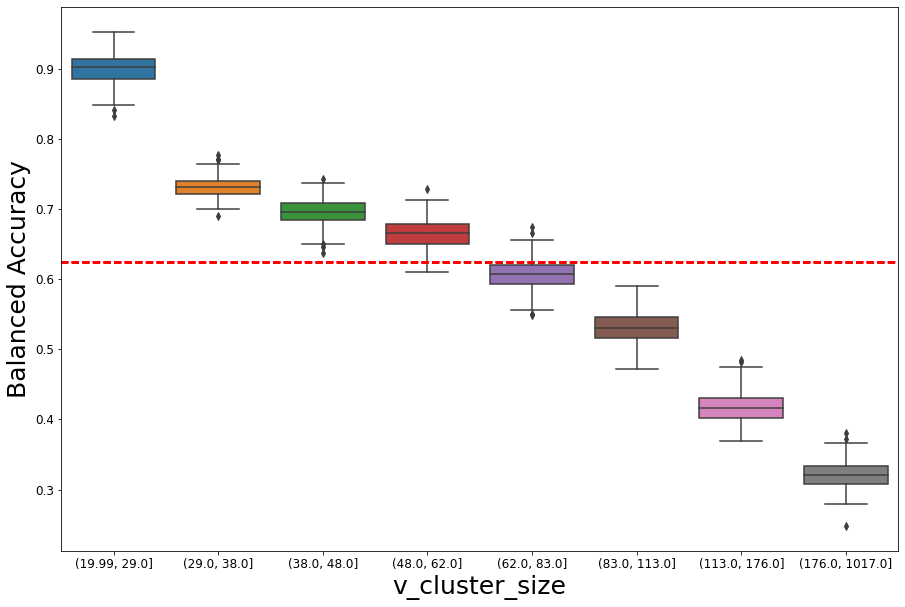

In [35]:
import scipy.stats
feat_list = ['v_sampling_fraction','v_cluster_size','v_timespan','oster','PD','cherries']
feat = feat_list[1]
#y_mean = np.mean(result_df[feat+'_balanced_acc'])
#low_CI_bound,high_CI_bound = scipy.stats.t.interval(0.95,len(result_df)-1,loc=y_mean,
#                                                   scale=scipy.stats.sem(result_df[feat+'_balanced_acc']))
y_mean = np.mean(ave_acc)
low_CI_bound,high_CI_bound = scipy.stats.t.interval(0.95,200-1,loc=y_mean,
                                                   scale=scipy.stats.sem(ave_acc))
fig2 = plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 12})
cats, bins = pd.qcut(df[feat], num_bin, retbins=True, duplicates='drop',precision=2)
a = list(cats.unique())
a.sort()
sns.boxplot(x=feat, y=feat+"_balanced_acc", data=result_df,order=a)
p1 = plt.axhline(linewidth=2, color='r', ls='dashed', y=y_mean)
p2 = plt.axhline(linewidth=2, color='r', ls='dashed', y=low_CI_bound)
p3 = plt.axhline(linewidth=2, color='r', ls='dashed', y=high_CI_bound)
plt.ylabel('Balanced Accuracy',fontsize=25)
plt.xlabel(feat,fontsize=25)

In [36]:
len(ave_acc)

200

In [37]:
low_CI_bound

0.623012416504754

#### Interval correction for paper

In [61]:
ref = result_df['oster'].unique()[4]

In [62]:
ref

Interval(4.0600000000000005, 18.02, closed='right')

In [63]:
inv = pd.Interval(left=4.060, right=18.02)

In [66]:
result_df['oster'] = result_df['oster'].apply(lambda x: inv if x ==ref else x)


In [52]:
import scipy.stats
def plot_mis_aly(result_df, df, PT_df, R0_df, contact_df, label_df, y_mean,low_CI_bound,high_CI_bound,metrics):
    fig = plt.figure(figsize=(30,30))
    grid = plt.GridSpec(30,40,wspace=10,hspace=10)
    font_size=15
    degree = 60
    plt.rcParams.update({'font.size': 15})
    feat_list = ['v_sampling_fraction','v_cluster_size','v_timespan','oster','PD','state','PT','R0']
    feat = feat_list[0]
    plt.subplot(grid[2:9,0:12])
    p1 = plt.axhline(linewidth=2, color='r', ls='dashed', y=y_mean)
    p2 = plt.axhline(linewidth=2, color='r', ls='dashed', y=low_CI_bound)
    p3 = plt.axhline(linewidth=2, color='r', ls='dashed', y=high_CI_bound)
    cats, bins = pd.qcut(df[feat], num_bin, retbins=True, duplicates='drop',precision=2)
    a = list(cats.unique())
    a.sort()
    ax = sns.boxplot(x=feat, y=feat+"_balanced_acc", data=result_df,order=a)
    plt.legend([p1],['Average weighted cross entropy loss'],loc="upper right",fontsize=font_size,framealpha=0.5)
    plt.ylabel('Weighted cross entropy loss',fontsize=25)
    plt.xlabel('Sampling Fraction',fontsize=25)
    ax.set(ylim=(0.45, 0.85))
    ax.set_xticklabels(ax.get_xticklabels(),rotation=degree)
    plt.title('a.',loc='left',fontsize=30)
    
    plt.subplot(grid[2:9,14:26])
    feat = feat_list[1]
    p1 = plt.axhline(linewidth=2, color='r', ls='dashed', y=y_mean)
    p2 = plt.axhline(linewidth=2, color='r', ls='dashed', y=low_CI_bound)
    p3 = plt.axhline(linewidth=2, color='r', ls='dashed', y=high_CI_bound)
    cats, bins = pd.qcut(df[feat], num_bin, retbins=True, duplicates='drop',precision=2)
    a = list(cats.unique())
    a.sort()
    ax = sns.boxplot(x=feat, y=feat+"_balanced_acc", data=result_df,order=a)
    plt.legend([p1],['Average weighted cross entropy loss'],loc="upper right",fontsize=font_size,framealpha=0.5)
    plt.ylabel('Weighted cross entropy loss',fontsize=25)
    plt.xlabel('Cluster Size',fontsize=25)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=degree)
    

    plt.subplot(grid[2:9,28:40])
    feat = feat_list[2]
    p1 = plt.axhline(linewidth=2, color='r', ls='dashed', y=y_mean)
    p2 = plt.axhline(linewidth=2, color='r', ls='dashed', y=low_CI_bound)
    p3 = plt.axhline(linewidth=2, color='r', ls='dashed', y=high_CI_bound)
    cats, bins = pd.qcut(df[feat], num_bin, retbins=True, duplicates='drop',precision=2)
    a = list(cats.unique())
    a.sort()
    ax = sns.boxplot(x=feat, y=feat+"_balanced_acc", data=result_df,order=a)
    plt.legend([p1],['Average weighted cross entropy Loss'],loc="upper right",fontsize=font_size,framealpha=0.5)
    plt.ylabel('Weighted cross entropy loss',fontsize=25)
    plt.xlabel('Time Span',fontsize=25)
    ax.set(ylim=(0.47, 0.82))
    ax.set_xticklabels(ax.get_xticklabels(),rotation=degree)

    plt.subplot(grid[12:19,6:18])
    #plt.subplot(grid[12:19,0:12])
    feat = feat_list[3]
    p1 = plt.axhline(linewidth=2, color='r', ls='dashed', y=y_mean)
    p2 = plt.axhline(linewidth=2, color='r', ls='dashed', y=low_CI_bound)
    p3 = plt.axhline(linewidth=2, color='r', ls='dashed', y=high_CI_bound)
    cats, bins = pd.qcut(df[feat], num_bin, retbins=True, duplicates='drop',precision=2)
    a = list(cats.unique())
    a.sort()
    #a[0] = inv
    ax = sns.boxplot(x=feat, y=feat+"_balanced_acc", data=result_df,order=a)
    plt.legend([p1],['Average weighted cross entropy loss'],loc="upper right",fontsize=font_size,framealpha=0.5)
    plt.ylabel('Weighted cross entropy loss',fontsize=25)
    plt.xlabel('Oster',fontsize=25)
    ax.set(ylim=(0.47, 0.85))
    ax.set_xticklabels(ax.get_xticklabels(),rotation=degree)
    plt.title('b.',loc='left',fontsize=30)
    
    plt.subplot(grid[12:19,22:34])
    #plt.subplot(grid[12:19,14:26])
    feat = feat_list[4]
    p1 = plt.axhline(linewidth=2, color='r', ls='dashed', y=y_mean)
    p2 = plt.axhline(linewidth=2, color='r', ls='dashed', y=low_CI_bound)
    p3 = plt.axhline(linewidth=2, color='r', ls='dashed', y=high_CI_bound)
    cats, bins = pd.qcut(df[feat], num_bin, retbins=True, duplicates='drop',precision=2)
    a = list(cats.unique())
    a.sort()
    ax = sns.boxplot(x=feat, y=feat+"_balanced_acc", data=result_df,order=a)
    plt.legend([p1],['Average weighted cross entropy loss'],loc="upper right",fontsize=font_size,framealpha=0.5)
    plt.ylabel('Weighted cross entropy loss',fontsize=25)
    plt.xlabel('PD',fontsize=25)
    ax.set(ylim=(0.45, 0.8))
    ax.set_xticklabels(ax.get_xticklabels(),rotation=degree)
    
    #plt.subplot(grid[21:28,28:40])
    plt.subplot(grid[22:29,0:12])
    feat = 'Contact'
    p1 = plt.axhline(linewidth=2, color='r', ls='dashed', y=y_mean)
    p2 = plt.axhline(linewidth=2, color='r', ls='dashed', y=low_CI_bound)
    p3 = plt.axhline(linewidth=2, color='r', ls='dashed', y=high_CI_bound)
    a = [15,20]
    ax = sns.boxplot(x=feat, y=feat+"_balanced_acc", data=contact_df,order=a)
    plt.legend([p1],['Average weighted cross entropy loss'],loc="upper right",fontsize=font_size,framealpha=0.5)
    plt.ylabel('Weighted cross entropy loss',fontsize=25)
    plt.xlabel('Initial contact number',fontsize=25)
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=degree)
    ax.set(ylim=(0.2, 1.25))
    plt.title('c.',loc='left',fontsize=30)
    
    #plt.subplot(grid[30:37,6:18])
    plt.subplot(grid[22:29,14:26])
    feat = feat_list[6]
    p1 = plt.axhline(linewidth=2, color='r', ls='dashed', y=y_mean)
    p2 = plt.axhline(linewidth=2, color='r', ls='dashed', y=low_CI_bound)
    p3 = plt.axhline(linewidth=2, color='r', ls='dashed', y=high_CI_bound)
    a = [ 0.015, 0.025]
    ax = sns.boxplot(x=feat, y=feat+"_balanced_acc", data=PT_df,order=a)
    plt.legend([p1],['Average weighted cross entropy loss'],loc="upper right",fontsize=font_size,framealpha=0.5)
    plt.ylabel('Weighted cross entropy loss',fontsize=25)
    plt.xlabel('Mean P(T)',fontsize=25)
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=degree)
    ax.set(ylim=(0.5, 1.05))

    #plt.subplot(grid[30:37,22:34])
    plt.subplot(grid[22:29,28:40])
    feat = feat_list[7]
    p1 = plt.axhline(linewidth=2, color='r', ls='dashed', y=y_mean)
    p2 = plt.axhline(linewidth=2, color='r', ls='dashed', y=low_CI_bound)
    p3 = plt.axhline(linewidth=2, color='r', ls='dashed', y=high_CI_bound)
    a = [0.7, 0.9, 1.5]
    ax = sns.boxplot(x=feat, y=feat+"_balanced_acc", data=R0_df,order=a)
    plt.legend([p1],['Average weighted cross entropy loss'],loc="upper right",fontsize=font_size,framealpha=0.5)
    plt.ylabel('Weighted cross entropy loss',fontsize=25)
    plt.xlabel(r'Initial $R_0$',fontsize=25)
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=degree)
    ax.set(ylim=(0.25, 1.4))
    plt.show()
    fig.savefig('../paper/mis_aly_tb.eps',dpi=1200,format='eps',bbox_inches='tight',pad_inches=0.0)

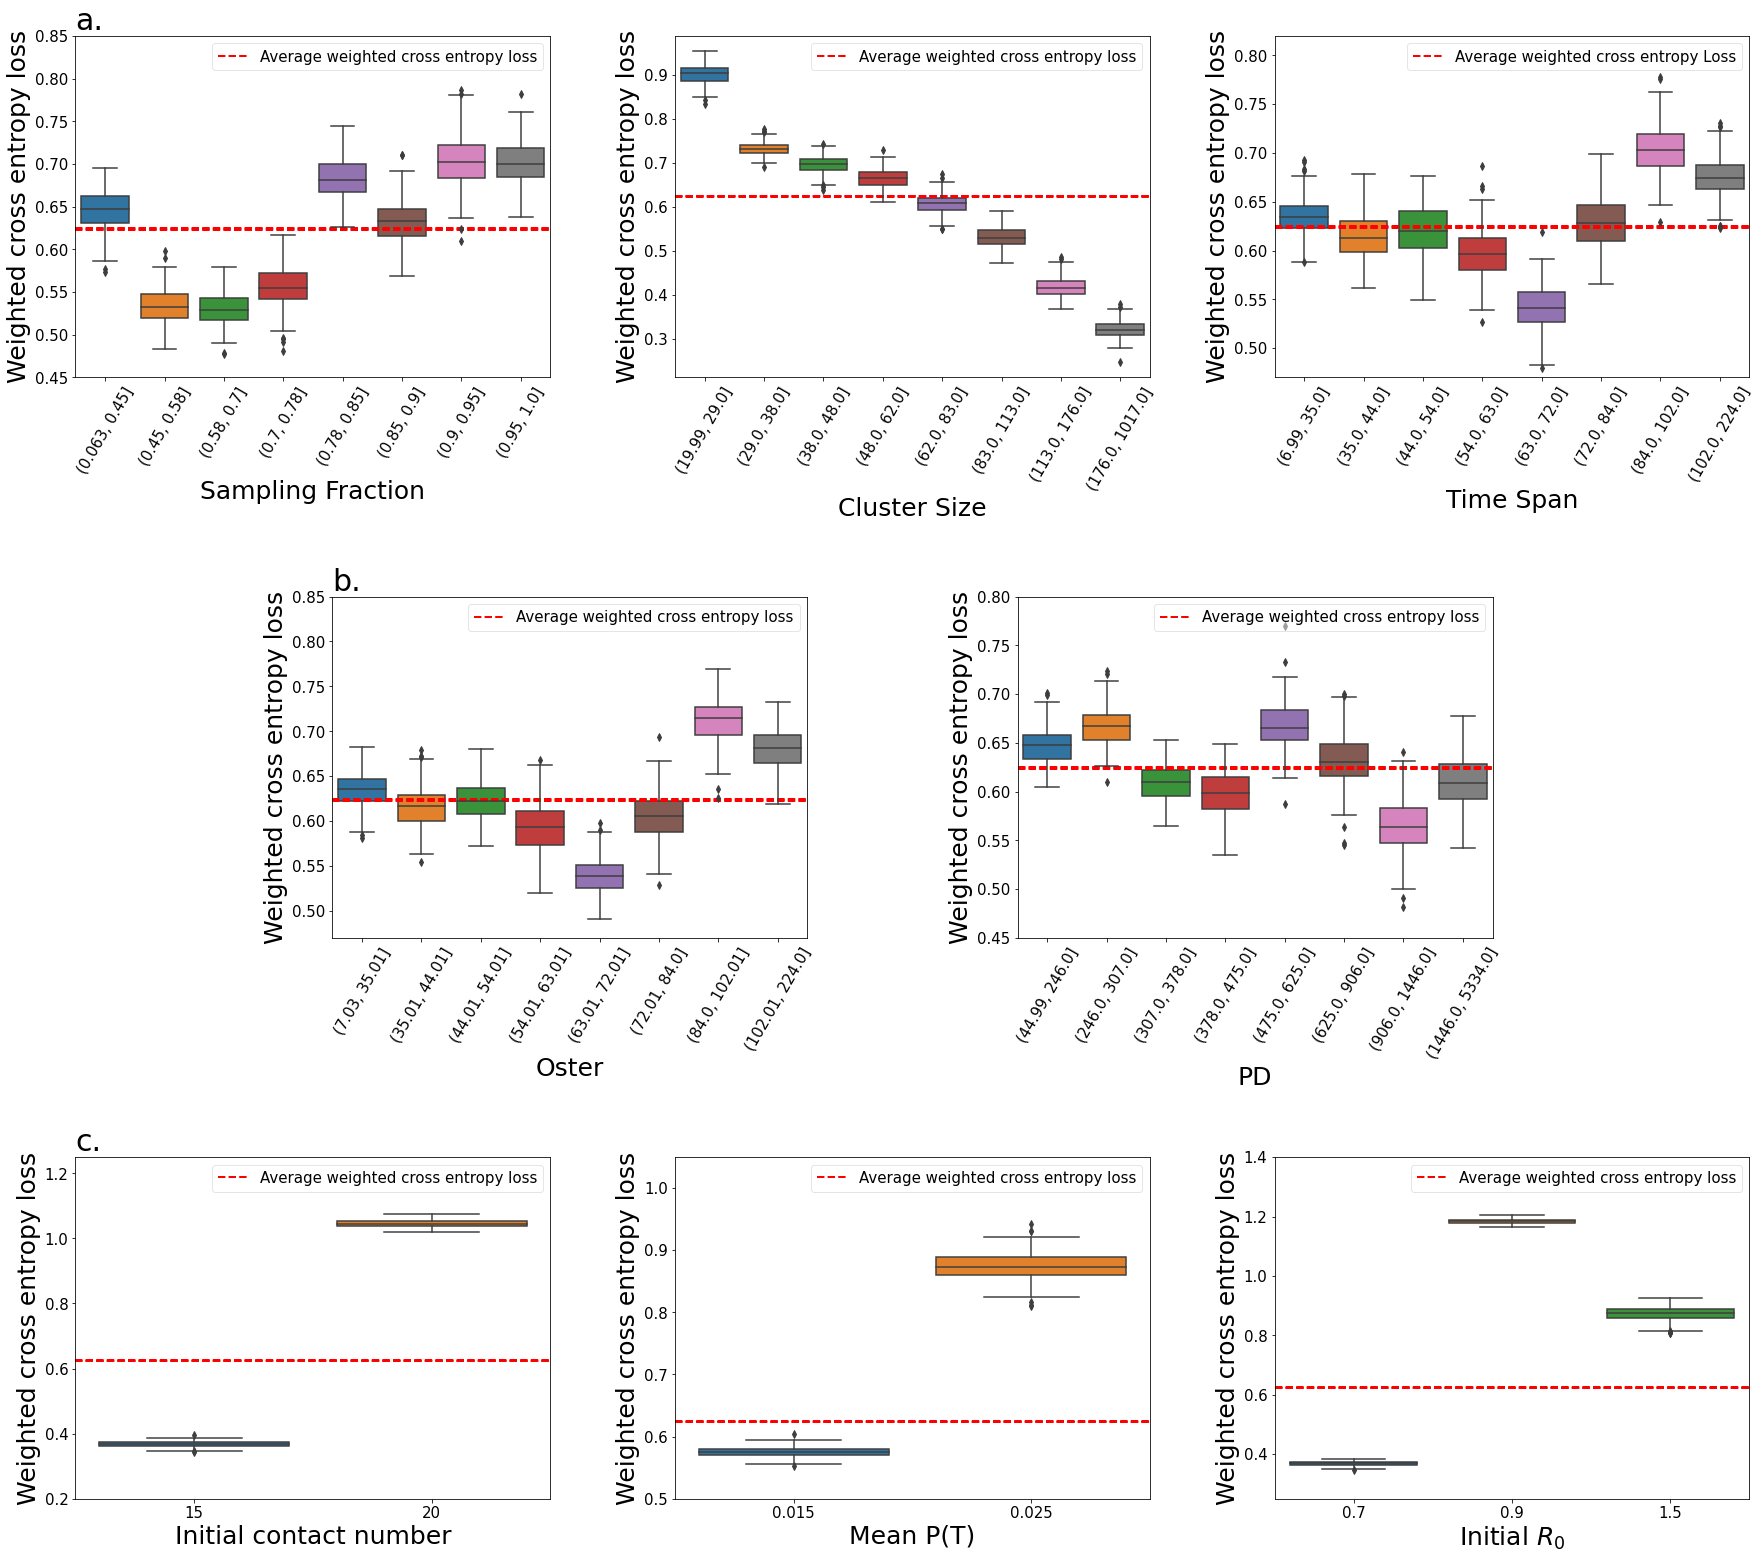

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [53]:
y_mean = np.mean(ave_acc)
low_CI_bound,high_CI_bound = scipy.stats.t.interval(0.95,200-1,loc=y_mean,
                                                   scale=scipy.stats.sem(ave_acc))
plot_mis_aly(result_df,  df, PT_df, R0_df, contact_df, label_df, y_mean,low_CI_bound,high_CI_bound,'Balanced Acc')